In [182]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import zipfile
import shapely
import pylab


In [4]:
if os.getenv ('PUIDATA') is None:
    os.environ['PUIDATA'] = '/Users/mac/Desktop/CUSP/PUI/PUIdata'

In [36]:
if not os.path.isfile(os.getenv('PUIDATA') + '/' + 'nyct2010_16d.zip'):
    if not os.path.isfile('nyct2010_16d.zip'):
        !curl -O 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip'
        os.system("mv nycb2010_16d.zip " + os.getenv('PUIDATA'))
zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + 'nycb2010_16d.zip')
zf.extractall(os.getenv('PUIDATA'))
zf.close
if not os.path.isfile(os.getenv('PUIDATA') + '/' + 'nycb2010_16d/nycb2010.shp'):
    print('The file is not there. Something is wrong')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0  1155k      0  0:00:04  0:00:04 --:--:-- 1143k


In [53]:
shape_path = os.getenv('PUIDATA') + '/' + 'nycb2010_16d/nycb2010.shp'
ct_shape = GeoDataFrame.from_file(shape_path)

In [54]:
ct_shape = ct_shape[ct_shape['BoroName'] == 'Brooklyn']
ct_shape.head(3)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((982421.0634155273 178133.8510131836,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((985596.1882324219 193858.6517944336,..."
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((986271.9053955078 193612.9270019531,..."


In [55]:
ct_latlon = ct_shape.to_crs(epsg=4326)
ct_latlon.head(3)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365179...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981347...


In [63]:
cusp = shapely.geometry.Point((-73.986580, 40.693351))

In [65]:
print(cusp)

POINT (-73.98658 40.693351)


In [173]:
for i in range(len(ct_latlon.geometry)):
    if shapely.geometry.asShape(ct_latlon.geometry.iloc[i]).contains(cusp):
        #print(ct_latlon.geometry[i])
        print(i)
        print(ct_latlon.BCTCB2010.iloc[i])

9061
30011001009


In [103]:
print('CUSP is contained in', list(ct_latlon.geometry)[9061])

CUSP is contained in POLYGON ((-73.98619262163143 40.69375351893803, -73.98621117787486 40.69338386010248, -73.98622595691907 40.69308831340506, -73.98725396415627 40.69312490273173, -73.98722751058244 40.69379951950236, -73.98619262163143 40.69375351893803))


In [121]:
ct_latlon_sample = ct_latlon.sample(frac=1/10, replace=False, weights=None, random_state=None, axis=0)
len(ct_latlon_sample)

968

In [137]:
len(ct_latlon)

9682

In [178]:
ct_latlon[ct_latlon.BCTCB2010 == '30011001009']

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
35383,30011001009,3,Brooklyn,1009,001100,69934.269433,1061.280668,POLYGON ((-73.98619262163143 40.69375351893803...


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


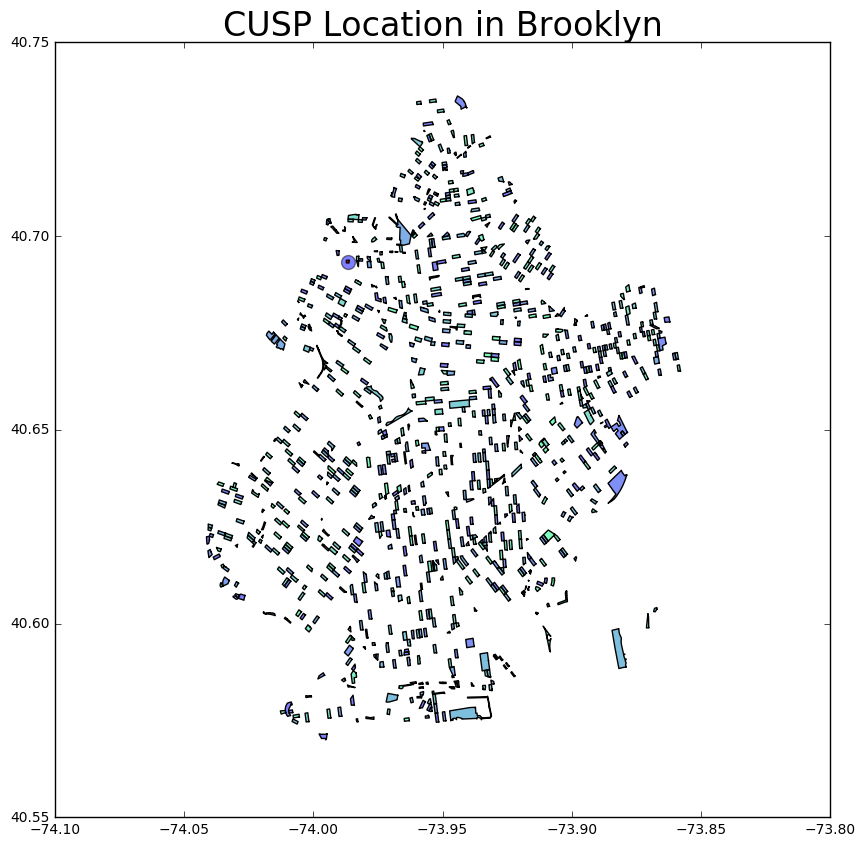

In [181]:
f, ax = plt.subplots(figsize=(10,10))
ct_latlon_sample.plot(ax=ax, colormap='winter')
pylab.scatter(-73.98658, 40.693351, c='b', s=100, marker='o', alpha=0.5)
ct_latlon[ct_latlon.BCTCB2010 == '30011001009'].plot(ax=ax, color='red', alpha=1)
ax.set_title("CUSP Location in Brooklyn", fontsize=24)

### Firgure 1: CUSP Location in Brooklyn